# Plot example hydrograph for methods

In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np

import seaborn as sns
import string
import cartopy
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from pathlib import Path
from glob import glob

# Set Config

In [6]:
start_date = '2009-11-01'
end_date   = '2009-11-30'

# Load Dataframes

In [7]:
df_pcrglob = pd.read_csv("/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/results/pcr-globwb/evaluation_period/simulations/12007_pcr-globwb_evaluation_simulations.csv", index_col='time')
df_wflow = pd.read_csv("/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/results/wflow_sbm/evaluation_period_calibrated/simulations/12007_wflow_calibrated_evaluation_simulations.csv", index_col='time')

# Create obs uncertainty and mask dates

In [8]:
df_obs = pd.read_csv("/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/aux_data/CAMELS-GB/data/timeseries/CAMELS_GB_hydromet_timeseries_12007_19701001-20150930.csv", index_col='date')
df_obs['upper_uncertainty'] = df_obs['discharge_vol'] * 1.20
df_obs['lower_uncertainty'] = df_obs['discharge_vol'] * 0.85
df_obs['average_uncertainty'] = df_obs['discharge_vol'] * 1.175

df_obs['upper_diff'] = df_obs['upper_uncertainty'] - df_obs['discharge_vol']
df_obs['lower_diff'] = df_obs['lower_uncertainty'] - df_obs['discharge_vol']
df_obs['average_diff'] = df_obs['average_uncertainty'] - df_obs['discharge_vol']

In [9]:
# Select water year
mask = (df_pcrglob.index >= start_date) & (df_pcrglob.index <= end_date)
df_pcrglob = df_pcrglob.loc[mask]
# df_obs_year = df_obs.loc[mask]

# Select water year
mask = (df_wflow.index >= start_date) & (df_wflow.index <= end_date)
df_wflow = df_wflow.loc[mask]
# df_obs_year = df_obs.loc[mask]

# Select water year
mask = (df_obs.index >= start_date) & (df_obs.index <= end_date)
df_obs = df_obs.loc[mask]

In [10]:
df_diff = (df_wflow.evaluation - df_pcrglob.sim).abs().to_frame('diff')

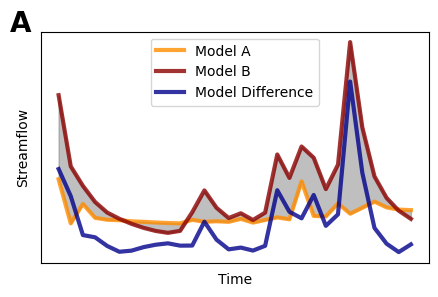

In [45]:
fig, ax = plt.subplots(sharex=False, figsize=(5,3))

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=True) # labels along the bottom edge are off

ax1 = sns.lineplot(ax=ax, x="time", y="sim",  data=df_pcrglob, color='darkorange',  label=r'Model A', alpha=0.8, linewidth=3)
ax2 = sns.lineplot(ax=ax, x="time", y="evaluation",  data=df_wflow, color='darkred',  label=r'Model B', alpha=0.8, linewidth=3)
ax3 = sns.lineplot(ax=ax, x="time", y="diff",  data=df_diff, color='darkblue',  label=r'Model Difference', alpha=0.8, linewidth=3)
ax1.text(-0.08,1, string.ascii_uppercase[0], transform=ax.transAxes, 
            size=20, weight='bold')

line = ax1.get_lines()
line2 = ax2.get_lines()

plt.fill_between(df_wflow.index, df_wflow.evaluation, df_pcrglob.sim, color='gray', alpha=0.5)

plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.xlabel('Time')
plt.ylabel('Streamflow')
plt.legend()
plt.savefig(f'/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/plots/example_hydrograph_1.png', bbox_inches='tight')

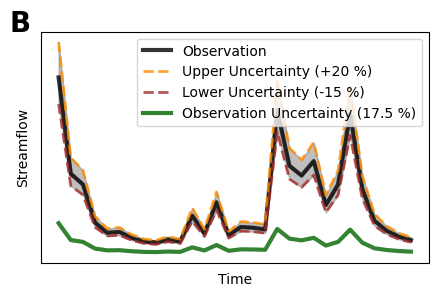

In [46]:
fig, ax = plt.subplots(sharex=False, figsize=(5,3))

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=True) # labels along the bottom edge are off

ax1 = sns.lineplot(ax=ax, x="date", y="discharge_vol",  data=df_obs, color='black',  label=r'Observation', alpha=0.8, linewidth=3)
ax2 = sns.lineplot(ax=ax, x="date", y="upper_uncertainty",  data=df_obs, color='darkorange',  label=r'Upper Uncertainty (+20 %)', alpha=0.8, linewidth=2)
ax3 = sns.lineplot(ax=ax, x="date", y="lower_uncertainty",  data=df_obs, color='brown',  label=r'Lower Uncertainty (-15 %)', alpha=0.8, linewidth=2)
ax4 = sns.lineplot(ax=ax, x="date", y="average_diff",  data=df_obs, color='darkgreen',  label=r'Observation Uncertainty (17.5 %)', alpha=0.8, linewidth=3)

ax2.lines[1].set_linestyle("--")
ax3.lines[2].set_linestyle("--")

ax1.text(-0.08,1, string.ascii_uppercase[1], transform=ax.transAxes, 
            size=20, weight='bold')

line = ax1.get_lines()
line2 = ax2.get_lines()

plt.fill_between(df_obs.index, df_obs.upper_uncertainty, df_obs.discharge_vol, color='gray', alpha=0.5)
plt.fill_between(df_obs.index, df_obs.lower_uncertainty, df_obs.discharge_vol, color='gray', alpha=0.5)

plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.xlabel('Time')
plt.ylabel('Streamflow')
plt.legend()

plt.savefig(f'/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/plots/example_hydrograph_2.png', bbox_inches='tight')

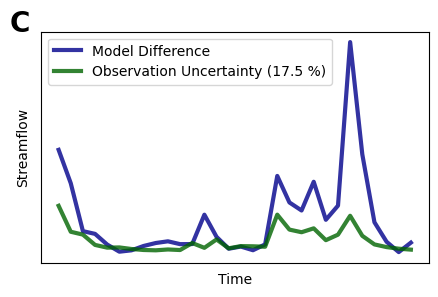

In [47]:
fig, ax = plt.subplots(sharex=False, figsize=(5,3))

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=True) # labels along the bottom edge are off



ax3 = sns.lineplot(ax=ax, x="time", y="diff",  data=df_diff, color='darkblue',  label=r'Model Difference', alpha=0.8, linewidth=3)
ax4 = sns.lineplot(ax=ax, x="date", y="average_diff",  data=df_obs, color='darkgreen',  label=r'Observation Uncertainty (17.5 %)', alpha=0.8, linewidth=3)
ax3.text(-0.08,1, string.ascii_uppercase[2], transform=ax.transAxes, 
            size=20, weight='bold')

line = ax1.get_lines()
line2 = ax2.get_lines()

# plt.fill_between(df_wflow.index, df_wflow.evaluation, df_pcrglob.sim, color='gray', alpha=0.5)

plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.xlabel('Time')
plt.ylabel('Streamflow')
plt.legend()
plt.savefig(f'/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/plots/example_hydrograph_3.png', bbox_inches='tight')

In [ ]:
# Create plot
fig, axes = plt.subplots(3, 1, sharex=False, figsize=(30,30))

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

params = {'legend.fontsize': 25,
          'legend.handlelength': 2,
          'xtick.labelsize': 30,
          'ytick.labelsize': 30}
plot.rcParams.update(params)




sns.lineplot(ax=axes[0], x="time", y="discharge",  data=df_eval_3km_1, color='darkorange',  label=r'$\bf{3km - KGE: 0.38}$', alpha=0.8, linewidth=3)
sns.lineplot(ax=axes[0], x="time", y="discharge",  data=df_eval_1km_1, color='darkgreen',    label='1km - KGE: 0.26', alpha=0.8, linewidth=3)
sns.lineplot(ax=axes[0], x="time", y="discharge",  data=df_eval_200m_1, color='darkred', label='200m - KGE: 0.19', alpha=0.8, linewidth=3)

sns.lineplot(ax=axes[0], x="time", y="discharge", data=df_bench_1, linewidth=3.5,linestyle="dashed", color='tab:cyan', label='10 Year Climatological Mean', alpha=1.0)
sns.lineplot(ax=axes[0], x="time", y="discharge", data=df_obs_1, linewidth=3.5, color='tab:blue', label='Streamflow Observations', alpha=1.0)


sns.lineplot(ax=axes[1], x="time", y="discharge",  data=df_eval_3km_2, color='darkorange',  label='3km - KGE: 0.37', alpha=0.8, linewidth=3)
sns.lineplot(ax=axes[1], x="time", y="discharge",  data=df_eval_1km_2, color='darkgreen',    label=r'$\bf{1km - KGE: 0.63}$', alpha=0.8, linewidth=3)
sns.lineplot(ax=axes[1], x="time", y="discharge",  data=df_eval_200m_2, color='darkred', label='200m - KGE: 0.59', alpha=0.8, linewidth=3)

sns.lineplot(ax=axes[1], x="time", y="discharge", data=df_bench_2, linestyle="dashed", linewidth=3.5, color='tab:cyan', label='10 Year Climatological Mean', alpha=1.0)
sns.lineplot(ax=axes[1], x="time", y="discharge", data=df_obs_2, linewidth=3.5, color='tab:blue', label='Streamflow Observations', alpha=1.0)


sns.lineplot(ax=axes[2], x="time", y="discharge",  data=df_eval_3km_3, color='darkorange',  label='3km - KGE: 0.64', alpha=0.8, linewidth=3)
sns.lineplot(ax=axes[2], x="time", y="discharge",  data=df_eval_1km_3, color='darkgreen',    label='1km - KGE: 0.73', alpha=0.8, linewidth=3)
sns.lineplot(ax=axes[2], x="time", y="discharge",  data=df_eval_200m_3, color='darkred', label=r'$\bf{200m - KGE: 0.82}$', alpha=0.8, linewidth=3)

sns.lineplot(ax=axes[2], x="time", y="discharge", data=df_bench_3, linewidth=3.5,linestyle="dashed", color='tab:cyan', label='10 Year Climatological Median', alpha=1.0)
sns.lineplot(ax=axes[2], x="time", y="discharge", data=df_obs_3, linewidth=3.5, color='tab:blue', label='Streamflow Observations', alpha=1.0)


axes[0].set_xlabel(' ')
axes[1].set_xlabel(' ')
axes[2].set_xlabel('Date', size=30)

axes[0].set_ylabel('Q (m3/s)', fontsize=30)
axes[1].set_ylabel('Q (m3/s)', fontsize=30)
axes[2].set_ylabel('Q (m3/s)', fontsize=30)

axes[0].set_ylim([0,250])
axes[1].set_ylim([0,25])
axes[2].set_ylim([0,140])

axes[0].set_title('Basin ID: 06878000', size=30)
axes[1].set_title('Basin ID: 02231342', size=30)
axes[2].set_title('Basin ID: 06043500', size=30)

# axes[0].text(-0.08,1, string.ascii_uppercase[0], transform=axes[0].transAxes, 
#             size=40, weight='bold')
# axes[1].text(-0.08,1, string.ascii_uppercase[1], transform=axes[1].transAxes, 
#             size=40, weight='bold')
# axes[2].text(-0.08,1, string.ascii_uppercase[2], transform=axes[2].transAxes, 
#             size=40, weight='bold')

import string
axes = axes.flat

for n, ax in enumerate(axes):

     
    ax.text(-0.05, 1.0, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=40, weight='bold')

plt.tight_layout()
plt.savefig(f'/gpfs/work1/0/wtrcycle/users/jaerts/revisie_camels_wflow/final_figures/Figure_5.png', dpi=300)
# plt.savefig(f'{OUTDIR}/Figure_5_lowrez.png', transparant=True, dpi=50)